In [2]:
# Morphological operations
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
img = cv2.imread('Resolute ai\Fabric15.jpg', 1) # i put zero because i wanted gray level image if i had put 1 i would have gotten color image

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 8.0000e+00, 5.0000e+00, 9.0000e+00, 1.2000e+01,
        2.0000e+01, 3.7000e+01, 3.5000e+01, 5.2000e+01, 7.2000e+01,
        1.3300e+02, 1.1300e+02, 2.0900e+02, 1.8800e+02, 3.1600e+02,
        4.2000e+02, 3.4200e+02, 6.0900e+02, 5.0500e+02, 8.6100e+02,
        7.7000e+02, 1.3490e+03, 1.0380e+03, 1.8460e+03, 1.4330e+03,
        2.5710e+03, 2.9880e+03, 2.2930e+03, 3.9710e+03, 3.0060e+03,
        5.0770e+03, 3.9410e+03, 6.5940e+03, 4.8790e+03, 8.1890e+03,
        9.1690e+03, 6.7290e+03, 1.1219e+04, 8.03

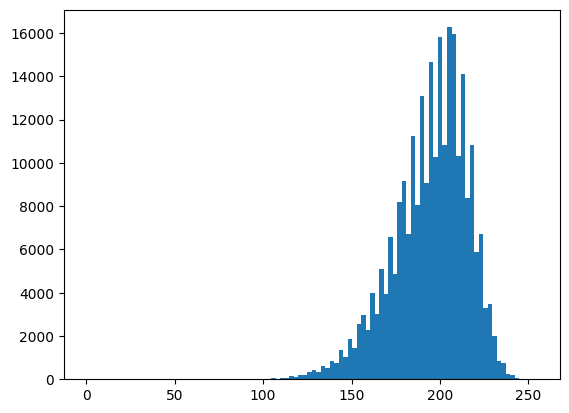

In [6]:

plt.hist(img.flat, bins=100, range=(0,255))

I had to flatten the image as it was a 2D image and i can only give 1D array and the range was from 0 to 255 because of the colors of the image

I am thresholding all the values in my image between 0 and 255

In [34]:
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8) # this is a 3x3 matrices of value 1 print the line to see
# print(kernel)
errosion = cv2.erode(th, kernel, iterations=2)
dilation = cv2.dilate(errosion, kernel, iterations=1)

# Find Countours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image for countr
for cnt in (contours):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),3)



cv2.imshow("Original", img)
cv2.imshow("OTSU Image", th) 
cv2.imshow("Eroded Image", errosion)
cv2.imshow("Erroded + dialated", dilation)
cv2.imshow("Detections", img)
cv2.waitKey(0)
cv2.destroyAllWindows()